# Integration of SVM and MVO 

This notebook computes and visualizes the results of the computational experiments

In [1]:
import numpy as np
from pandas.tseries.offsets import Day, MonthBegin
pth = 'cache/Experiments/'
cache_path = 'cache/'
img_path = "Images/"
from python.packages import *
from python.analysis_tools import *
%matplotlib inline

### Alternating Direction Method Effectiveness (Solution quality and time) for the full set of problems described in notebook ADM Comparison NoteBook Timing.ipynb

In [2]:
###import pickle files
import pickle
dpi_setting = 150
#single penalization parameter
with open(pth + "svm_adm_2023.pkl",'rb') as fp:
  (adm_wgts, adm_obj_inf, adm_svm_wgts, adm_z, adm_xi) = pickle.load(fp)

with open(pth + "svm_padm6_2023.pkl",'rb') as fp:
  (padm_wgts, padm_obj_inf, padm_svm_wgts, padm_z, padm_xi) = pickle.load(fp)

#SVM Exact
with open(pth + "svm_exact_2023.pkl",'rb') as fp:
  (exact_wgts, exact_obj_inf, exact_svm_wgts, exact_z, exact_xi) = pickle.load(fp)

#wrds_svm = pd.read_pickle(cache_path + 'WRDS_ASOF.pkl')
tics = list(exact_wgts.columns)
dates = exact_wgts.index
print("valid tickers:", tics)

valid tickers: ['AAPL', 'ABC', 'ABMD', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AJG', 'AKAM', 'ALB', 'ALK', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMT', 'AMZN', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ATO', 'AVY', 'AZO', 'BA', 'BAX', 'BBY', 'BDX', 'BKNG', 'BLL', 'BMY', 'BSX', 'BWA', 'CAG', 'CAH', 'CAT', 'CCI', 'CCL', 'CDNS', 'CERN', 'CHD', 'CHRW', 'CI', 'CL', 'CLX', 'CMCSA', 'CMI', 'CMS', 'CNP', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'CTXS', 'CVS', 'CVX', 'D', 'DD', 'DGX', 'DHR', 'DIS', 'DISH', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'ES', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'F', 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FISV', 'FLS', 'FMC', 'GD', 'GIS', 'GLW', 'GPC', 'GPS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HFC', 'HOG', 'HOLX', 'HON', 'HP', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HSY', 'HUM', 'IBM', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IRM', 

In [3]:
print("Number of instances where the ADM formulation finished first: ", (adm_obj_inf['Run-Time'] < exact_obj_inf['Run-Time']).sum())
print("Number of instances: ", (adm_obj_inf['Run-Time'] < padm_obj_inf['Run-Time']).count())

Number of instances where the ADM formulation finished first:  243
Number of instances:  243


In [4]:
adm_feasible = adm_xi.sum(axis=1) < 10**(-9)
print("Number of instances where the ADM found an SVM feasible solution: ", sum(adm_feasible))
pd.DataFrame(adm_feasible.reset_index()[~adm_feasible.values])

Number of instances where the ADM found an SVM feasible solution:  0


,StartMonth,0
0,2000-07-01,False
1,2000-08-01,False
2,2000-09-01,False
3,2000-10-01,False
4,2000-11-01,False
...,...,...
238,2020-05-01,False
239,2020-06-01,False
240,2020-07-01,False
241,2020-08-01,False


In [5]:
padm_feasible = padm_xi.sum(axis=1) < 10**(-8)
print("Number of instances where the Randomized PADM found an SVM feasible solution: ", sum(padm_feasible))
pd.DataFrame(adm_feasible.reset_index()[~padm_feasible.values])

Number of instances where the Randomized PADM found an SVM feasible solution:  0


,StartMonth,0
0,2000-07-01,False
1,2000-08-01,False
2,2000-09-01,False
3,2000-10-01,False
4,2000-11-01,False
...,...,...
238,2020-05-01,False
239,2020-06-01,False
240,2020-07-01,False
241,2020-08-01,False


### Solution Quality: MIP Gap for feasible instances by comparing $x^{\intercal} \Sigma x + \frac{1}{2} ||w||^2 $ for the exact solution method and the PADM approaches (random and deterministic)

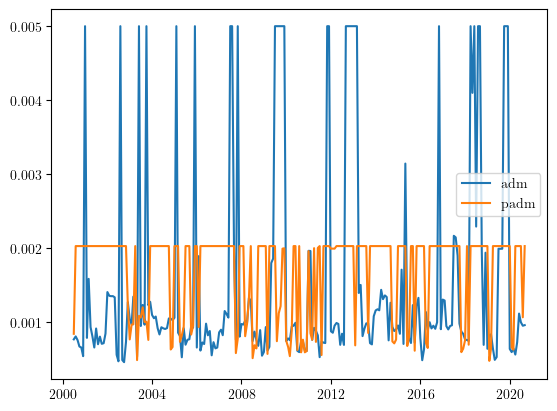

In [6]:
plt.plot(adm_obj_inf.Infeasibility,  label = 'adm')
plt.plot(padm_obj_inf.Infeasibility,  label = 'padm')
plt.legend()

ADM
Median MIP Gap:  0.23723853206704915
95% MIP Gap:  2.9407491151961054
70% MIP Gap:  0.6077932934467847
25% MIP Gap:  0.09776117589665823
5% MIP Gap:  -0.002932420312445236
PADM
Median MIP Gap:  0.663470693043912
95% MIP Gap:  1.1338503324073839
70% MIP Gap:  0.8232256605209908
25% MIP Gap:  0.20934044155817488
5% MIP Gap:  0.0013535930029716678


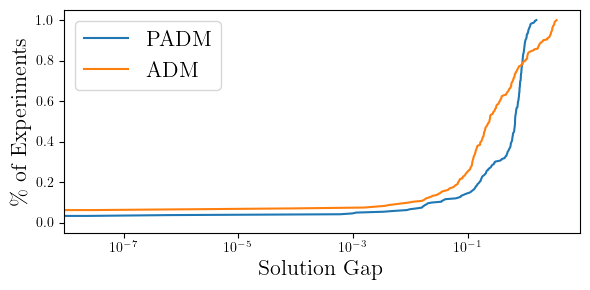

In [7]:
exact_obj = exact_obj_inf.Risk + exact_obj_inf.Margin + exact_obj_inf.Infeasibility
adm_obj = adm_obj_inf.Risk + adm_obj_inf.Margin + adm_obj_inf.Infeasibility
padm_obj = padm_obj_inf.Risk + padm_obj_inf.Margin + padm_obj_inf.Infeasibility

def print_MIP(obj_inf, exact_obj_inf, feasible = None, name=""):
    """
    print the MIP info
    :param obj_inf:
    :param exact_obj_inf:
    :param feasible:
    :param name:
    :return:
    """
    exact_obj = exact_obj_inf.Risk + exact_obj_inf.Margin + exact_obj_inf.Infeasibility
    obj = obj_inf.Risk + obj_inf.Margin + obj_inf.Infeasibility
    if feasible is not None:
        MIP_Gaps = (obj[feasible] / exact_obj[feasible] - 1)
    MIP_Gaps = (obj / exact_obj - 1)
    # MIP_Gaps.boxplot()
    #
    if name != "":
        print(name)
    print("Median MIP Gap: ", np.percentile(MIP_Gaps, 50))
    print("95% MIP Gap: ", np.percentile(MIP_Gaps, 95))
    print("70% MIP Gap: ", np.percentile(MIP_Gaps, 70))
    print("25% MIP Gap: ", np.percentile(MIP_Gaps, 25))
    print("5% MIP Gap: ", np.percentile(MIP_Gaps, 5))
    return MIP_Gaps


def print_risk_MIP(obj_inf, exact_obj_inf, feasible = None, name=""):
    """
    print the MIP info
    :param obj_inf:
    :param exact_obj_inf:
    :param feasible:
    :param name:
    :return:
    """
    exact_obj = exact_obj_inf.Risk + exact_obj_inf.Margin #+ exact_obj_inf.Infeasibility
    obj = obj_inf.Risk + obj_inf.Margin #+ obj_inf.Infeasibility
    if feasible is not None:
        MIP_Gaps = (obj[feasible] / exact_obj[feasible] - 1)
    MIP_Gaps = (obj / exact_obj - 1)
    # MIP_Gaps.boxplot()
    #
    if name != "":
        print(name)
    print("Median MIP Gap: ", np.percentile(MIP_Gaps, 50))
    print("95% MIP Gap: ", np.percentile(MIP_Gaps, 95))
    print("70% MIP Gap: ", np.percentile(MIP_Gaps, 70))
    print("25% MIP Gap: ", np.percentile(MIP_Gaps, 25))
    print("5% MIP Gap: ", np.percentile(MIP_Gaps, 5))
    return MIP_Gaps


adm_MIP = print_MIP(adm_obj_inf, exact_obj_inf, None, name = "ADM")
padm_MIP = print_MIP(padm_obj_inf, exact_obj_inf, None, name = "PADM")

padm_prob = np.linspace(0,1, len(padm_MIP))
adm_prob = np.linspace(0,1, len(adm_MIP))


adm_dt_cdf = np.sort(adm_MIP)
padm_dt_cdf = np.sort(padm_MIP)
plt.figure(figsize = (6,3))
plt.plot(padm_dt_cdf, padm_prob, label = "PADM")
plt.plot(adm_dt_cdf, adm_prob, label = "ADM")
plt.xscale('log')
plt.legend(fontsize = 16)
# plt.title("Solution Gap CDF: Randomized vs Deterministic PADM")
plt.ylabel("\% of Experiments",fontsize = 16)
plt.xlabel("Solution Gap",fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p8.svg", dpi = dpi_setting)

ADM
Median MIP Gap:  0.015492704720809103
95% MIP Gap:  0.7532722400175511
70% MIP Gap:  0.1199176931053911
25% MIP Gap:  -0.0740746716332199
5% MIP Gap:  -0.4123937171930901
PADM
Median MIP Gap:  -0.32237037812667435
95% MIP Gap:  0.11915566996695957
70% MIP Gap:  -0.0948521441033645
25% MIP Gap:  -0.4321288551964064
5% MIP Gap:  -0.5336707438182563


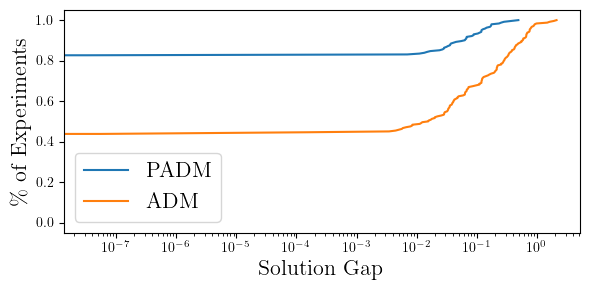

In [8]:
adm_MIP = print_risk_MIP(adm_obj_inf, exact_obj_inf, None, name = "ADM")
padm_MIP = print_risk_MIP(padm_obj_inf, exact_obj_inf, None, name = "PADM")


adm_dt_cdf = np.sort(adm_MIP)
padm_dt_cdf = np.sort(padm_MIP)
plt.figure(figsize = (6,3))
plt.plot(padm_dt_cdf, padm_prob, label = "PADM")
plt.plot(adm_dt_cdf, adm_prob, label = "ADM")
plt.xscale('log')
plt.legend(fontsize = 16)
# plt.title("Solution Gap CDF: Randomized vs Deterministic PADM")
plt.ylabel("\% of Experiments",fontsize = 16)
plt.xlabel("Solution Gap",fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p9.svg", dpi = dpi_setting)

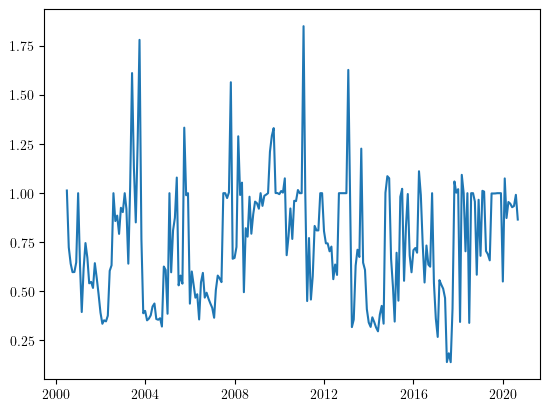

In [9]:
plt.plot((padm_obj_inf.Risk + padm_obj_inf.Margin)/(adm_obj_inf.Risk + adm_obj_inf.Margin))

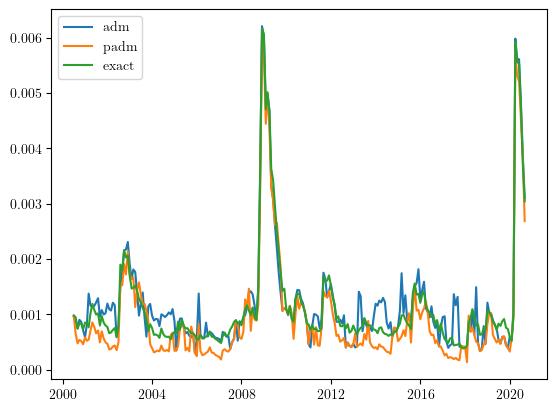

In [10]:
plt.plot(adm_obj_inf.Risk + adm_obj_inf.Margin, label = 'adm')
plt.plot(padm_obj_inf.Risk + padm_obj_inf.Margin, label = 'padm')
plt.plot(exact_obj_inf.Risk + exact_obj_inf.Margin, label = 'exact')
plt.legend()

#### Metrics for Comparison

$$ \gamma_1 = \frac{1}{T} \sum_{t = 1} ^ T \frac{1}{N}||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_1$$

$$\gamma_2 =  \max_{t = 1 \in [T]} \frac{1}{N} ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_1$$

$$\gamma_3 =  \frac{1}{T} \sum_{t = 1} ^ T  ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_{\infty}$$

$$\gamma_4 =  \max_{t = 1 \in [T]} ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_{\infty}$$

$$\gamma_5 =   \frac{1}{T} \sum_{t = 1} ^ T Q_{95}(\{|x_t^{\text{ADM}} - x_t^{\text{Exact}}|_i \}_{i=1}^N)$$

In [11]:
gamma1 = 100*np.abs(adm_wgts - exact_wgts).mean(axis = 1).mean() #average l1 norm
gamma2 = 100*np.abs(adm_wgts - exact_wgts).mean(axis = 1).max() #worst case l1 norm
gamma3 = 100*np.abs(adm_wgts - exact_wgts).max(axis = 1).mean() #average worst case difference
gamma4 = 100*np.abs(adm_wgts - exact_wgts).max(axis = 1).max() #worst case difference
gamma5 = 100*np.percentile(np.abs(adm_wgts - exact_wgts), 95, axis = 1).mean() #worst case difference

pd.DataFrame([gamma1,gamma2,gamma3,gamma4], index = ["$\gamma_1$", "$\gamma_2$", "$gamma_3$", "$\gamma_4$"], columns = ["Solution Quality Metrics"]).transpose()

,$\gamma_1$,$\gamma_2$,$gamma_3$,$\gamma_4$
Solution Quality Metrics,0.178941,0.580905,7.321353,29.313081


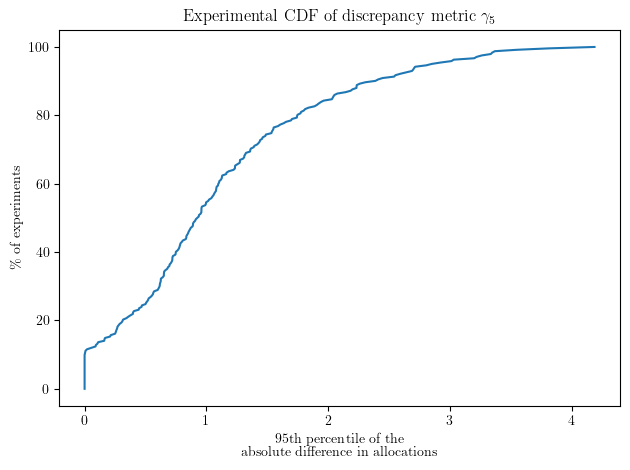

In [12]:
#raw_diffs = np.sort((adm_wgts - exact_wgts).values.flatten())
raw_diffs95 = np.sort(np.percentile(100*np.abs(adm_wgts - exact_wgts), 95, axis = 1))
raw_diffs99 = np.sort(np.percentile(100*np.abs(adm_wgts - exact_wgts), 99, axis = 1))
raw_diffs80 = np.sort(np.percentile(100*np.abs(adm_wgts - exact_wgts), 80, axis = 1))
raw_diffs50 = np.sort(np.percentile(100*np.abs(adm_wgts - exact_wgts), 50, axis = 1))

probs = np.linspace(0,1,len(raw_diffs95))
# plt.plot(probs, raw_diffs99)

plt.plot(raw_diffs95, 100*probs)
plt.title("Experimental CDF of discrepancy metric $\gamma_5$ ")
plt.ylabel("\% of experiments")
plt.xlabel("95th percentile of the \n absolute difference in allocations");
plt.tight_layout()
#plt.plot(probs,raw_diffs80);
# plt.plot(probs,raw_diffs50)
# u = np.percentile(np.abs(raw_diffs), 95)
# print(u)

### Selection Accuracy
$1 - \frac{|z^{\text{PADM}} - z^{\text{exact}}|}{\sum_i z_i^{\text{PADM}} + z_i^{\text{exact}}}$
Reported for all instances

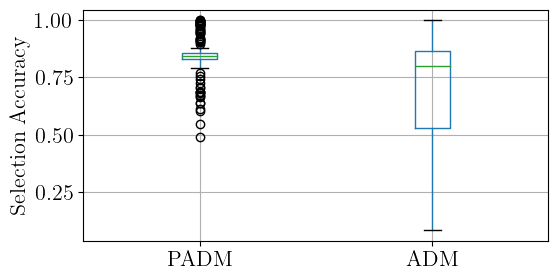

In [13]:
S_padm = 1 - np.abs(padm_z - exact_z).sum(axis=1)/(padm_z + exact_z).sum(axis=1)
S_adm = 1 - np.abs(adm_z - exact_z).sum(axis=1)/(adm_z + exact_z).sum(axis=1)

pd.DataFrame({'PADM': S_padm, 'ADM': S_adm}).boxplot(figsize = (6,3), fontsize = 16);
plt.ylabel("Selection Accuracy", fontsize = 16)
plt.savefig(img_path + "p10.svg", dpi = dpi_setting)

In [14]:
print("Selection Accuracy: Median ", np.percentile(S_padm,50))
print("Selection Accuracy: Median ", np.percentile(S_adm,50))

print("Selection Accuracy: Median ", np.percentile(S_padm,75))
print("Selection Accuracy: Median ", np.percentile(S_adm,75))

print("Selection Accuracy: Median ", np.percentile(S_padm,0))
print("Selection Accuracy: Median ", np.percentile(S_adm,0))
S_adm

Selection Accuracy: Median  0.8421052631578947
Selection Accuracy: Median  0.7982456140350837
Selection Accuracy: Median  0.8552631578947368
Selection Accuracy: Median  0.8640350877192983
Selection Accuracy: Median  0.4896755162241888
Selection Accuracy: Median  0.08368200836820083


StartMonth
2000-07-01    0.890351
2000-08-01    0.921053
2000-09-01    0.995614
2000-10-01    0.864035
2000-11-01    0.881579
                ...   
2020-05-01    0.944072
2020-06-01    0.762667
2020-07-01    0.670103
2020-08-01    0.709497
2020-09-01    0.701370
Length: 243, dtype: float64

#### Timing 

Average time 

and run-time distributions

In [15]:
adm_ave_time = adm_obj_inf['Run-Time'].mean()
padm_ave_time = padm_obj_inf['Run-Time'].mean()
exact_ave_time = exact_obj_inf['Run-Time'].mean()
print("Mean Time")
print("Exact: ", exact_ave_time)
print("ADM: ", adm_ave_time)
print("PADM: ", padm_ave_time)

adm_med_time = np.percentile(adm_obj_inf['Run-Time'],50)
padm_med_time = np.percentile(padm_obj_inf['Run-Time'],50)
exact_med_time = np.percentile(exact_obj_inf['Run-Time'],50)
print("Median Time")
print("Exact: ", exact_med_time)
print("ADM: ", adm_med_time)
print("PADM: ", padm_med_time)

adm_med_time = np.percentile(adm_obj_inf['Run-Time'],95)
padm_med_time = np.percentile(padm_obj_inf['Run-Time'],95)
exact_med_time = np.percentile(exact_obj_inf['Run-Time'],95)
print("95th Percentile Time")
print("Exact", exact_med_time)
print("ADM", adm_med_time)
print("PADM: ", padm_med_time)

Mean Time
Exact:  93.14034081584632
ADM:  13.64692403357706
PADM:  37.4525836917108
Median Time
Exact:  100.09776377677917
ADM:  12.30869174003601
PADM:  34.46443963050842
95th Percentile Time
Exact 100.20084168910981
ADM 26.45072042942047
PADM:  53.86043360233305


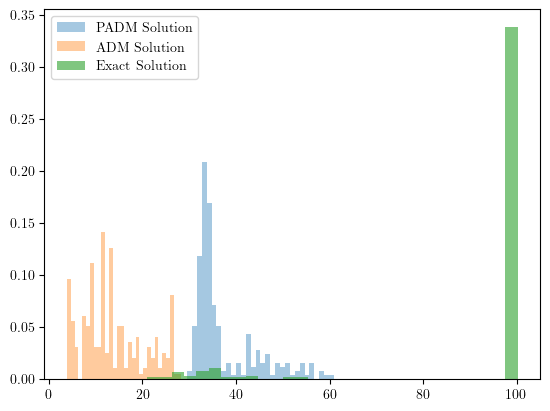

In [16]:
plt.hist(padm_obj_inf['Run-Time'], bins = 30, density = True, label = "PADM Solution", alpha = 0.4);
plt.hist(adm_obj_inf['Run-Time'], bins = 30, density = True, label = "ADM Solution", alpha = 0.4);
plt.hist(exact_obj_inf['Run-Time'], bins = 30, density = True, label = "Exact Solution",alpha = 0.6);
plt.legend();

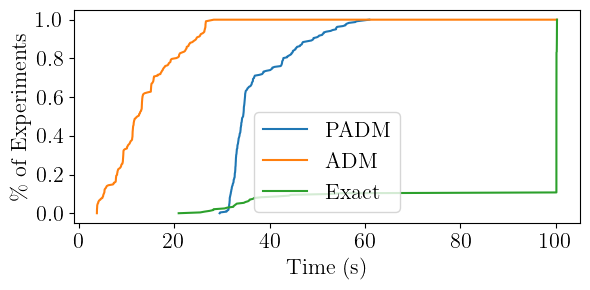

In [17]:
prob = np.linspace(0,1, len(exact_obj_inf['Run-Time']))
prob2 = np.zeros(len(prob)+1)
prob2[:len(prob)] = prob
prob2[-1] = 1

adm_dt_cdf = np.sort(np.array(adm_obj_inf['Run-Time'].tolist()+[max(exact_obj_inf['Run-Time'])]))
padm_dt_cdf = np.sort(np.array(padm_obj_inf['Run-Time'].tolist()+[max(padm_obj_inf['Run-Time'])]))

exact_dt_cdf = np.sort(np.array(exact_obj_inf['Run-Time']))

plt.figure(figsize = (6,3))
plt.plot(padm_dt_cdf, prob2, label = "PADM")
plt.plot(adm_dt_cdf, prob2, label = "ADM")

plt.plot(exact_dt_cdf, prob, label = "Exact")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize = 16)
#plt.title("Run-time CDF: ADM vs. Exact Solution")
plt.ylabel("\% of Experiments",fontsize = 16)
plt.xlabel("Time (s)",fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p11.svg", dpi = dpi_setting)

### Performance Ratio Analysis
$\frac{t_i^{m}}{\text{min} \{t_i^a: a \in M \} }$ where $M = \{ \text{Random PADM},\  \text{ADM},\  \text{Exact}\}$

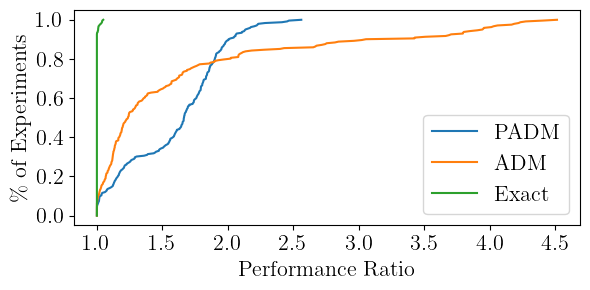

In [26]:
times = pd.DataFrame({"PADM" : padm_obj, "ADM":adm_obj, 'Exact': exact_obj})
performance_ratio = times.divide(times.min(axis=1), axis=0 )
#performance_ratio.plot()
prob = np.linspace(0,1, len(performance_ratio))
plt.figure(figsize = (6,3))
for col in performance_ratio.columns:
  cdf = performance_ratio[col].sort_values()
  plt.plot(cdf,prob, label = col)

plt.ylabel("\% of Experiments", fontsize = 16)
plt.xlabel("Performance Ratio", fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p12.svg", dpi = dpi_setting)

In [19]:
(performance_ratio < 1.89).sum()/len(performance_ratio)

PADM     0.781893
ADM      0.781893
Exact    1.000000
dtype: float64

In [28]:
(performance_ratio > 2.6).sum()/len(performance_ratio)

PADM     0.000000
ADM      0.144033
Exact    0.000000
dtype: float64

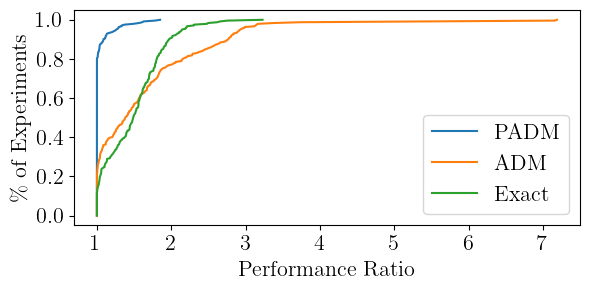

In [20]:
times = pd.DataFrame({"PADM" : padm_obj_inf.Risk + padm_obj_inf.Margin,
                      "ADM":adm_obj_inf.Risk + adm_obj_inf.Margin,
                      'Exact': exact_obj_inf.Risk + exact_obj_inf.Margin})
performance_ratio = times.divide(times.min(axis=1), axis=0 )
#performance_ratio.plot()
prob = np.linspace(0,1, len(performance_ratio))
plt.figure(figsize = (6,3))
for col in performance_ratio.columns:
  cdf = performance_ratio[col].sort_values()
  plt.plot(cdf,prob, label = col)

plt.ylabel("\% of Experiments", fontsize = 16)
plt.xlabel("Performance Ratio", fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p13.svg", dpi = dpi_setting)

In [21]:
(performance_ratio < 1.601).sum()/len(performance_ratio)

PADM     0.983539
ADM      0.621399
Exact    0.621399
dtype: float64

In [22]:
(performance_ratio > 2.5).sum()/len(performance_ratio)

PADM     0.000000
ADM      0.144033
Exact    0.016461
dtype: float64

### Performance Ratio Analysis
$\frac{o_i^{m}}{\text{min} \{o_i^a: a \in M \} }$ where $M = \{ \text{Random PADM},\  \text{ADM},\  \text{Exact}\}$

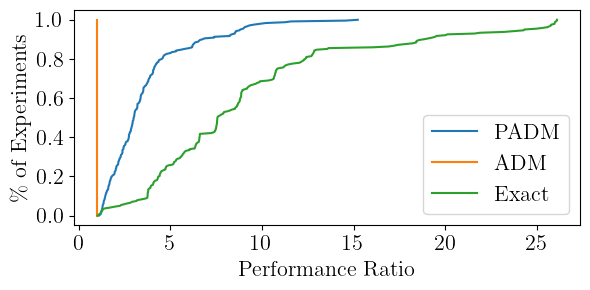

In [24]:
times = pd.DataFrame({"PADM" : padm_obj_inf['Run-Time'], "ADM":adm_obj_inf['Run-Time'], 'Exact': exact_obj_inf['Run-Time']})
performance_ratio = times.divide(times.min(axis=1), axis=0 )
#performance_ratio.plot()
prob = np.linspace(0,1, len(performance_ratio))
plt.figure(figsize = (6,3))
for col in performance_ratio.columns:
  cdf = performance_ratio[col].sort_values()
  plt.plot(cdf,prob, label = col )
plt.ylabel("\% of Experiments", fontsize = 16)
plt.xlabel("Performance Ratio", fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)

plt.tight_layout()
#plt.ylabel("\% of Experiments", fontsize = 16)
plt.savefig(img_path + "p14.svg", dpi = dpi_setting)

In [25]:
exact_obj_inf.Gaps

pct_5 = np.percentile(exact_obj_inf.Gaps,25)
pct_50 = np.percentile(exact_obj_inf.Gaps,50)
pct_95 = np.percentile(exact_obj_inf.Gaps,75)
print("Gaps")
print("5", pct_5)
print("50", pct_50)
print("95: ", pct_95)

Gaps
5 0.17897076007833732
50 0.4417615526178264
95:  0.5810085039192618


In [110]:
sum(exact_obj_inf['Run-Time'] < 99)

26

In [111]:
print("PADM performance ratio less than 6 ", sum(performance_ratio.PADM < 6)/len(performance_ratio))
print("Exact performance ratio less than 6 ", sum(performance_ratio.Exact < 6)/len(performance_ratio))

PADM performance ratio less than 6  0.8518518518518519
Exact performance ratio less than 6  0.3333333333333333


In [112]:
sum(padm_obj_inf['Run-Time'] <  exact_obj_inf['Run-Time'])

229

In [113]:
slowest = (padm_obj_inf['Run-Time'] <  exact_obj_inf['Run-Time'])&(adm_obj_inf['Run-Time'] <  exact_obj_inf['Run-Time'])
slowest.sum()/len(slowest)

0.9423868312757202

In [114]:
slowest = (exact_obj_inf['Run-Time'] <  padm_obj_inf['Run-Time'])&(adm_obj_inf['Run-Time'] <  padm_obj_inf['Run-Time'])
slowest.sum()/len(slowest)

0.05761316872427984

In [115]:
slowest = (exact_obj_inf['Run-Time'] <  adm_obj_inf['Run-Time'])&(padm_obj_inf['Run-Time'] <  adm_obj_inf['Run-Time'])
slowest.sum()/len(slowest)

0.0